# Abstract

El mercado inmobiliario en las grandes ciudades posee particularidades respecto a zonas menos pobladas, una de ellas podría estar dada en precios más elevados por m$^2$, mayor demanda/oferta de alquileres frente a las ventas, entre otras. Estas particularidades pueden tener explicaciones multi-variadas. En lo particular el mercado Argentino, en un contexto devaluatorio del Peso (Ars) frente al Dolar Estadounidense (USD), el mercado inmobiliario sule utilizarse, o se cree coloquialmente, como un instrumento financiero para el resguardo frente a la volatibilidad de la moneda. La afirmación anterior posee bases en creencias populares y no una medición contrastada oficialmente. Intentaremos describir si existe una correlación entre precios, cariaciones de constos de la construcción (CAC) y movilidad de la moneda. Esperamos utilizar como descriptor la venta de inmuebles correlacionado con la devaluación de la moneda local. También suele observarse que los precios son _normalizados_ por m² y/o por zona. Nos preguntamos cuan representativas son estas métricas (promedio de precio/m² por zona) y si efectivamente estas medias son diferentes para diversas zonas y más profundamente si estos promedios son adecuados para informar el precio general de una zona.
Finalmente intentaremos profucir algún modelo que "ajuste" del _mejor_ modo posible para ver:

* Precios de propiedades por tipo y zona.
* Identificar velocidad de publicación (vp) asumiendo que una vp alta refleja una transacción "de alta demanda"
* Identificar si las descripiones y título de la publicación corelaciona con vp.


Analizaremos el mercado inmobiliario de Ciudad Autónoma de Buenos Arires (C.A.B.A) y conurbano bonaerense (AMBA) de Argentina. Para ello utilizaremos Datos provistos por <a href='https://www.properati.com.ar'>Properati</a> conteniendo publicaciones de transacciones inmobiliarias.


<u>**Fuentes**</u>:

+ Transacciones inmobiliarias: [properati](https://www.properati.com.ar/data/)
+ Evolución del dólar: [Banco de la Nacion Argentina](https://www.bna.com.ar/Personas)
+ Evolución del dolar informal: [Ambito financiero](https://www.ambito.com/contenidos/dolar-informal-historico.html)
+ Indices cer, uva, uvi: [Datos.gob](https://datos.gob.ar/dataset/sspm-cer-uva-uvi/archivo/sspm_94.2)
+ Indice cac: [Camara Argentina de la cosntrucción](https://www.cifrasonline.com.ar/indice-cac/)

Palabras claves: Mercado inmobiliario Argentina (zona AMBA), Peso, Dolar. CAC, UVA, UVI, CER.

$\color{lightblue}{\textit{Continuaremos trabajando con base en lo realizado en el }
\textbf{Desafío entregable: Visualización en Python}\text{, en esta oportunidad deberemos complementar con lo siguiente:}}$


1. Generar preguntas de interés o hipótesis de interés sobre el dataset elegido para el proyecto final.
2. Crear visualizaciones (univariados, bivariados o trivariados) junto con resúmenes numéricos básicos acordes con los tipos de variables disponibles.
3. Interpretar los resultados obtenidos}}$


In [1]:
# Imports nesecarios para conectrar con google drive.
from google.colab import drive
drive.mount('/content/drive')

# Manipulación de rutas
import os
# Manipulación de expresiones regulares
import re

# Manipulación de tablas y datos
import pandas as pd
import math
import numpy as np
from scipy import stats
# Visualización de faltantes
import missingno as msno

# Gráficos
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline


# Prity print
import pprint

Mounted at /content/drive


In [2]:
# Carpeta pública con las tablas sin procesar
ROOT_jc = "/content/drive/MyDrive/Data_Science_Coder"

# # Para ejecución local solamente
# ROOT_jc = '.'


In [3]:
f_name = 'properties.csv.zip'
path = os.path.join(ROOT_jc, f_name)
df = pd.read_csv(path)


generar visualizaciones (univariadas, bivariadas o multivariadas) junto con resúmenes numéricos acompañado de la interpretaciones respectivas que permitan responder la pregunta problema.

# Análisis Exploratorio de Datos (EDA)

# Limpieza de datos

Segementaremos el dataset para quedarnos con los valores que _potencialmente_ describan al Problema Comercial:

* Región de interes: Area Metropolitana de Buenos Aires (AMBA).
* Operaciones comerciales: Ventas, Alquileres, Alquiler temporal.
* Moneda de transacción: Peso Argentino (ARS) y Dólar (USD).
* Tipo de propiedad: Intentaremos incluir la mayor varabilidad de tipos _'definidos'_ de propiedades.

Hacemos una inspección general de los datos donde esperamos encontrar y tomar una desición para aquellos valores que excedan el análisis que podamos realizar en esta etapa:

* Valores extremos: Identificar aquellos extremos donde no podremos generalizar el problema. 
* Valores inválidos: Errores de carga/registro, nulos/vacíos. Analizaremos si podemos salvar estos registros utilizando sklearn.impute.IterativeImputer 

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 39 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   Unnamed: 0                  1000000 non-null  int64  
 1   id                          1000000 non-null  object 
 2   ad_type                     1000000 non-null  object 
 3   start_date                  1000000 non-null  object 
 4   end_date                    1000000 non-null  object 
 5   created_on                  1000000 non-null  object 
 6   lat                         894233 non-null   float64
 7   lon                         894191 non-null   float64
 8   l1                          1000000 non-null  object 
 9   l2                          1000000 non-null  object 
 10  l3                          965273 non-null   object 
 11  l4                          306162 non-null   object 
 12  l5                          5530 non-null     object 
 13

Nos quedamos con los registros para el AMBA/Argentina.

In [5]:
df.l1.unique()


array(['Argentina', 'Uruguay', 'Estados Unidos', 'Brasil'], dtype=object)

In [6]:
df = df[df.l1 == 'Argentina']


In [7]:
df.l2.unique()


array(['Bs.As. G.B.A. Zona Norte', 'Buenos Aires Costa Atlántica',
       'Entre Ríos', 'Misiones', 'Santa Fe', 'Bs.As. G.B.A. Zona Oeste',
       'Tucumán', 'Chubut', 'Capital Federal', 'Córdoba',
       'Buenos Aires Interior', 'Bs.As. G.B.A. Zona Sur', 'San Luis',
       'Neuquén', 'Río Negro', 'Mendoza', 'Corrientes', 'Salta',
       'La Pampa', 'Tierra Del Fuego', 'Chaco', 'Santa Cruz', 'Catamarca',
       'San Juan', 'Santiago Del Estero', 'Jujuy', 'La Rioja', 'Formosa'],
      dtype=object)

In [8]:
print(f'Hay {df.l2.isnull().sum()} valores nulos en l2, datos de provicias')


Hay 0 valores nulos en l2, datos de provicias


Nos quedamos con las localidades de AMBA para el nivel distrital l2 (Provincia/ Estado)

In [9]:
AMBA = ['Bs.As. G.B.A. Zona Norte', 'Bs.As. G.B.A. Zona Oeste',
        'Capital Federal', 'Bs.As. G.B.A. Zona Sur']

df = df[df.l2.isin(AMBA)]


In [10]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 657652 entries, 0 to 999999
Data columns (total 39 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  657652 non-null  int64  
 1   id                          657652 non-null  object 
 2   ad_type                     657652 non-null  object 
 3   start_date                  657652 non-null  object 
 4   end_date                    657652 non-null  object 
 5   created_on                  657652 non-null  object 
 6   lat                         588480 non-null  float64
 7   lon                         588441 non-null  float64
 8   l1                          657652 non-null  object 
 9   l2                          657652 non-null  object 
 10  l3                          650270 non-null  object 
 11  l4                          251011 non-null  object 
 12  l5                          5530 non-null    object 
 13  l6            

De 983_115 datos correspondientes a Argentina, nos quedamos con 657_652 que corresponden a la región de AMBA.

Buscamos los registros que están duplicados y vamos a eliminarlos.

In [11]:
print(f'\nHay {df.duplicated().sum()} registros duplicados\n')
# df = df.drop_duplicates(keep='first')



Hay 0 registros duplicados



**Inspeccionamos posibles columnas redundantes**

In [12]:
print('La columna start_date y created on poseen los mismos datos?')
print(f'Respuesta: {np.all(df.start_date == df.created_on)}')


La columna start_date y created on poseen los mismos datos?
Respuesta: True


Observando la descripción de cada feature vemos algunos que podrían **no** ser útiles.

In [13]:
for col in ['ad_type', 'l5', 'l6','currency']:
    print(f'Columna: {col}\nData: {df[col].unique()}\n')


Columna: ad_type
Data: ['Propiedad']

Columna: l5
Data: [nan 'Barrio Barrancas del Lago' 'Barrio El Golf' 'Barrio Los Alisos'
 'BarrioPortezuelo' 'Barrio Los Lagos' 'Barrio Lagos del Golf 2'
 'Barrio Residencial Pacheco 2' 'Barrio La Isla' 'Barrio Cabos del Lago'
 'Enyoi' 'Islas del Canal' 'Barrio El Yacht' 'Barrio Los Sauces'
 'Barrio Los Tilos' 'Barrio Los Castores' 'Barrio Las Glorietas'
 'QBay Yacht' 'Barrio La Alameda' 'Barrio Lagos del Golf 1'
 'Barrio Las Caletas' 'Barrio Residencial Pacheco 1']

Columna: l6
Data: [nan]

Columna: currency
Data: [nan 'ARS' 'USD' 'COP']



$\color{lightblue}{\textit{El dataframe posee columnas redundantes que serán eliminadas:}}$

+ **Unnamed: 0**: La primer columna posee repetidos los index.
+ **created_on**: Posee los mismos datos que _start_date_, ambas describen el inicio de la publicación.
+ **ad_type**: Posee el dato _'Propiedad'_ para toda la serie.
+ **l6**: Posee dato nulo _'nan'_ para toda la serie.

In [14]:
# Elimino columnas sin información o redundantes.
# La primer columna no contiene información.
df = df.iloc[:,1:]
# created_on = start_date; ad_type = propiedad, l6 = NaN.
df.drop(columns=['created_on', 'ad_type', 'l6'], inplace=True)


Inspeccionono valores inseperados.

In [15]:
print('Descripción: ', df[df.currency == 'COP'].description.to_list())
print('Tipo de operación: ',df[df.currency == 'COP'].operation_type.to_list())
print('Moneda: COP')


Descripción:  ['VENDO CASA LOTE AREA: 430M2 PRECIO: $230.000.000 MAS INFORMACIONM: 3153437780']
Tipo de operación:  ['Venta']
Moneda: COP


Tenemos solo un registro con moneda COP. Nos quedamos con valores DOLAR _USD_ y PESOS _ARS_

In [16]:
df.drop(df[df.currency == 'COP'].index, inplace=True)


Vemos que relación de valores nulos hay por feature

In [17]:
round(df.isnull().sum() / df.shape[0],2).sort_values(ascending = False)


l5                            0.99
l4                            0.62
price_period                  0.53
surface_total                 0.46
surface_covered               0.45
bedrooms                      0.31
rooms                         0.25
bathrooms                     0.20
lon                           0.11
lat                           0.11
price                         0.02
currency                      0.02
l3                            0.01
cac_workforce_variation       0.00
cac_materials_variation       0.00
cac_construction_cost         0.00
cac_construction_variation    0.00
cac_materials                 0.00
uva                           0.00
cac_workforce                 0.00
USD_Blue_buy                  0.00
cer                           0.00
USD_Blue_sell                 0.00
id                            0.00
USD_BN_sell                   0.00
USD_BN_buy                    0.00
operation_type                0.00
property_type                 0.00
description         

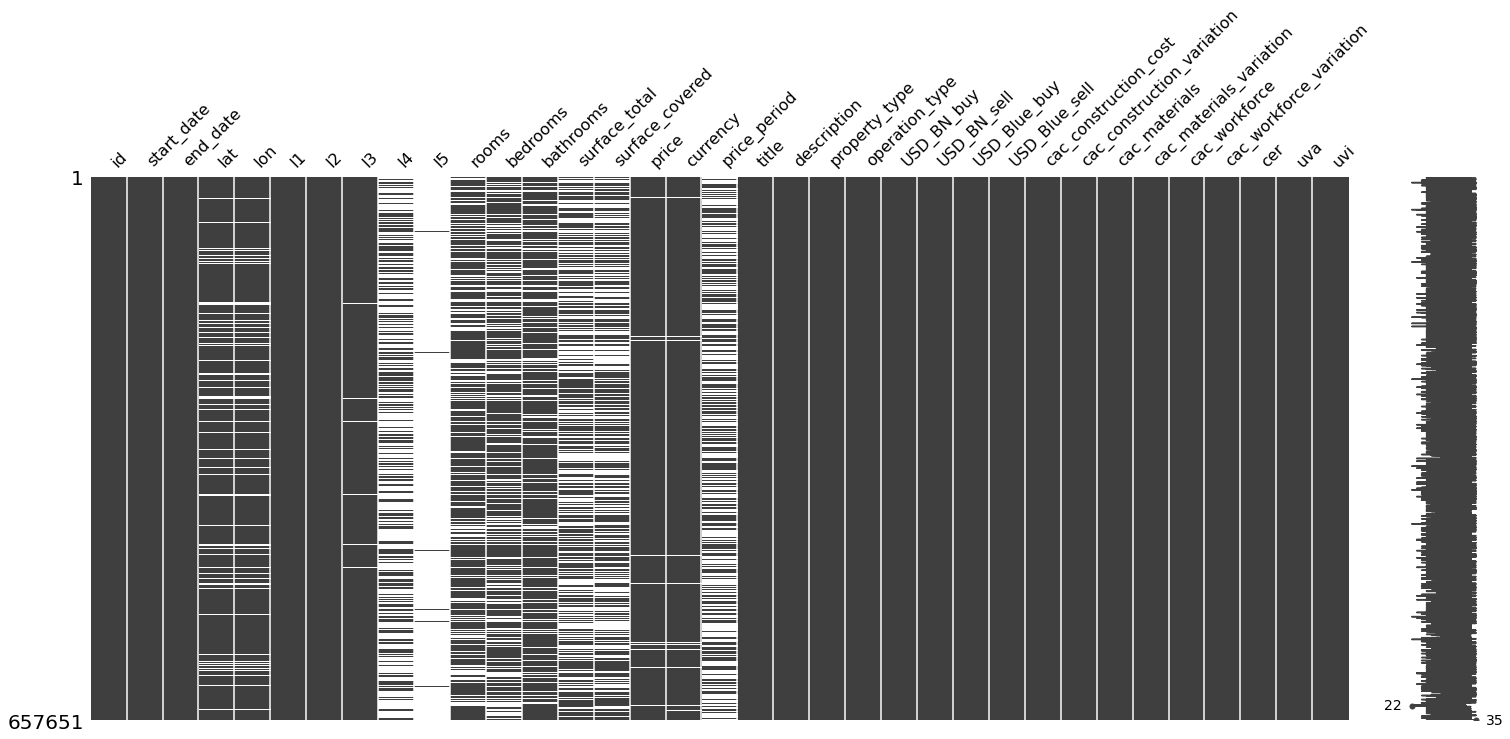

In [18]:
msno.matrix(df)


Elimnamos los registros que no informan tipo de moneda y/o precio

In [19]:
# Relación de valores nulos sobre la serie currency
round(df.currency.isnull().sum() / len(df.currency),3)


0.022

In [20]:
# Registramos los valores donde currency no es nulo. Perdemos un 2% de los datos
df = df[df.currency.notnull()]


In [21]:
# Relación de valores nulos sobre la serie l4 con valores verdaderos lat & lon
round((df.l4.isnull() & df.lat.isnull() & df.lon.isnull()).sum() / df.l4.isnull().sum(),3)


0.099

Para las siguientes columnas

| Features | Observación sobre datos faltantes    |  accion |
|----------|--------------------------------------|---------|
|_l5_      | son práctimacemnte falores faltantes.| Eliminar|
|_l4_      | 90% valores NaN podrían salvarse con lat/lon| Ver|
|_price_   | Los faltantes son pocos pero coiciden con currency| Ver|
|_currency_| Podría trabajarse los str de title y description| Ver|


In [22]:
df.l5.unique()


array([nan, 'Barrio Barrancas del Lago', 'Barrio El Golf',
       'Barrio Los Alisos', 'BarrioPortezuelo', 'Barrio Los Lagos',
       'Barrio Lagos del Golf 2', 'Barrio Residencial Pacheco 2',
       'Barrio La Isla', 'Barrio Cabos del Lago', 'Enyoi',
       'Islas del Canal', 'Barrio El Yacht', 'Barrio Los Sauces',
       'Barrio Las Glorietas', 'Barrio Los Tilos', 'QBay Yacht',
       'Barrio Los Castores', 'Barrio La Alameda',
       'Barrio Lagos del Golf 1', 'Barrio Las Caletas',
       'Barrio Residencial Pacheco 1'], dtype=object)

In [23]:
df.drop(columns=['l5'], inplace=True)


Vemos aquellos datos inconsistentes

Registros donde la surfece_covered es mayor a surface_total.

In [24]:
print(f'Representan un \
{round((df[(df.surface_covered > df.surface_total)].id.count()/len(df))*100, 3)} %\
del total')


Representan un 0.486 %del total


In [25]:
df = df[~(df.surface_covered > df.surface_total)]


# Obtención de Insights preliminares


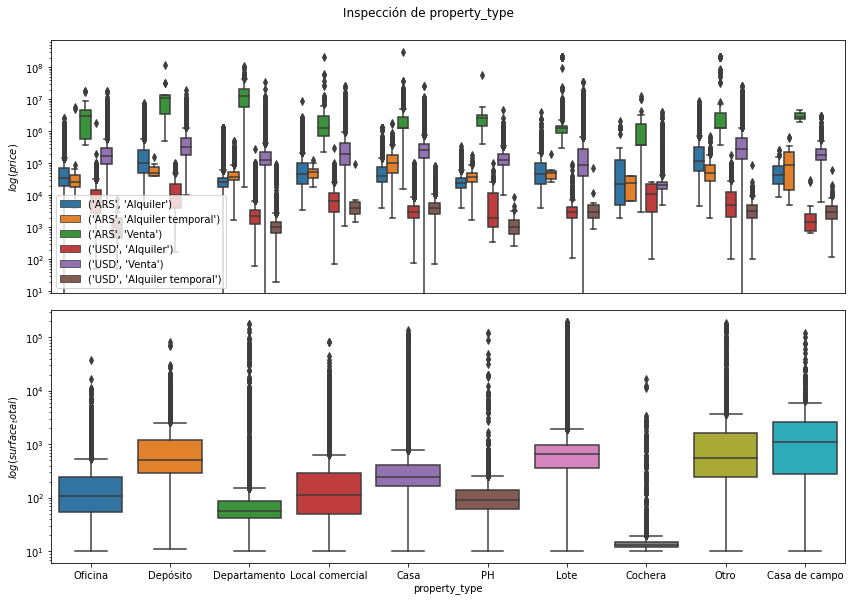

In [26]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

fig.suptitle('Inspección de property_type', y=1.04)

sns.boxplot(x="property_type", y="price", data=df, ax=axs[0],
            hue=df[['currency', 'operation_type']].apply(tuple, axis=1))
axs[0].set_yscale('log')
axs[0].set_ylabel('$log(price)$')
axs[0].get_xaxis().set_visible(False)

sns.boxplot(x="property_type", y="surface_total", data=df, ax=axs[1])
axs[1].set_yscale('log')
axs[1].set_ylabel('$log(surface_total)$')

fig.tight_layout()
plt.show()

**Propiedades no categorizadas**
---
Para el análisis que esperamos realizar no nos sirve la categoría "Otros" en _proprty_type_. Se puede plantear a futuro que tipo de registros "viven" en esta categoría. 

    # Estrategia_1: eliminar el valor para imputarlo luego
    df.loc[df.property_type=='Otro', 'property_type'] = np.nan

In [27]:
print(f'Hay {df[df.property_type == "Otro"].property_type.count()}\
 registros con valor "Otro" para property_type')

print(f'Representa un prorción del total igual a: \
{round(df[df.property_type == "Otro"].property_type.count()/len(df),3)}')


Hay 13914 registros con valor "Otro" para property_type
Representa un prorción del total igual a: 0.022


In [28]:
# Eliminamos los registros "Otro" para property_type
df = df[df.property_type != "Otro"]


# $\color{red}{\textbf{Identificación de Outliers}}$


Vamos a registrar aquellos valores extremos.
Utilizaremos el rango intercuartílico ([IQR](https://docs.oracle.com/cloud/help/es/pbcs_common/PFUSU/insights_metrics_IQR.htm#PFUSU-GUID-CF37CAEA-730B-4346-801E-64612719FF6B)) para encontrar los valores atípicos.

---
_Observación_:

Puede que este tipo de manejo sea algo "conservador" ya que si observamos la escala del eje Y (**_log_**) del gráfico _Inspección de property_type_ vemos que los valores extremos son muy dispersos (hasta 5 ordenes de magnitud mayores a la media).

In [29]:
def q_outlier(data):
    '''
    Calcula los límites inferiores y superiores intercuartílicos (IQR)

    Parameters
    ----------
    data: np.array_like
    
    return
    ------
    tuple: (lower_bound, upper_bound)
    '''
    q1 = np.nanquantile(data, 0.25)
    q3 = np.nanquantile(data, 0.75)
    IQR = q3 - q1
    
    return (q1 - (1.5 * IQR), q3 + (1.5 * IQR))

**Extremos por superficie**

* Registramos los extremos para superficie cubierta y total discriminado por tipo de propiedad.

In [30]:
# Tipos de propiedades
prop = df.property_type.unique()

# Superficie total
extremos_ST = dict(zip(prop, map(q_outlier,
            (df[df.property_type == p].surface_total.values for p in prop))
))

# Superficie cubierta
extremos_SC = dict(zip(prop, map(q_outlier,
            (df[df.property_type == p].surface_covered.values for p in prop))
))

print('Extremos superficie total:')
pprint.pprint(extremos_ST)
print('\nExtremos superficie cubierta:')
pprint.pprint(extremos_SC)


Extremos superficie total:
{'Casa': (-205.0, 795.0),
 'Casa de campo': (-3261.5, 6188.5),
 'Cochera': (7.5, 19.5),
 'Departamento': (-25.5, 154.5),
 'Depósito': (-1068.75, 2561.25),
 'Local comercial': (-308.0, 644.0),
 'Lote': (-568.125, 1906.875),
 'Oficina': (-237.5, 542.5),
 'PH': (-51.0, 253.0)}

Extremos superficie cubierta:
{'Casa': (-77.5, 462.5),
 'Casa de campo': (-125.0, 475.0),
 'Cochera': (7.5, 19.5),
 'Departamento': (-16.5, 131.5),
 'Depósito': (-1456.5, 3147.5),
 'Local comercial': (-290.0, 606.0),
 'Lote': (-875.0, 1645.0),
 'Oficina': (-246.5, 549.5),
 'PH': (-20.0, 172.0)}


Para aquellos valores extremos por tipo de propiedad quedan registrados como True

In [31]:
# Registramos los extremos de superficie por tipo de propiedad
df['surf_co_ext'] = df.property_type.map(extremos_SC, na_action='ignore')
df['surf_to_ext'] = df.property_type.map(extremos_ST, na_action='ignore')


In [32]:
df['surf_co_ext'] = df.apply(lambda x: x.surface_covered <= x.surf_co_ext[0]
                             or x.surface_covered >=x.surf_co_ext[1],
                             axis=1)

df['surf_to_ext'] = df.apply(lambda x: x.surface_covered <= x.surf_to_ext[0]
                             or x.surface_covered >=x.surf_to_ext[1],
                             axis=1)


**Extremos por precio**

* Vemos los precios por tipo de publicación y moneda.
* Vamos a normalizar a un tipo de moneda (UDS) según su cotización en la fecha de publicación. 

**Normalización de moneda**

Utilizamos la cotización del dolar "libre" compra (_Blue_buy_) correspondiente a la fecha de inidio publicación (_start_date_) para convertir de pesos argentinos (_ARS_) a dólares (_USD_).

In [33]:
def converter(price, quote, currency):
    '''
    Convierte de pesos (ARS) a dólares (USD) según la cotización.

    Parameters
    ----------
    price: int or float
    quote: int or float
    currency: str, only ("ARS" or "UDS")
    
    return
    ------
    tuple: float, converción de peso a dolar
    '''
    return price/quote if currency == 'ARS' else price


In [34]:
conv = lambda x: converter(x.price, x.USD_Blue_buy, x.currency)

df['price_USD'] = df.apply(conv, axis=1)


Vemos como es la distribución de precios por características.

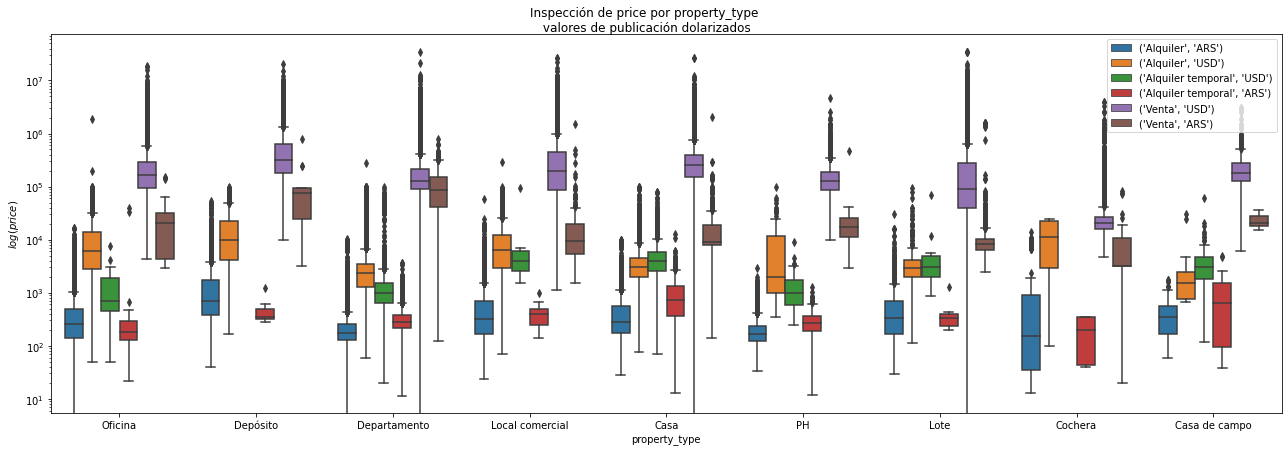

In [35]:
# Inspección segregada por moneda y tipo de operación.
fig, axs = plt.subplots(1,figsize=(18, 6))

tit = 'Inspección de price por property_type'\
    '\n valores de publicación dolarizados'

fig.suptitle(tit, y=1.04)

sns.boxplot(x="property_type", y="price_USD", data=df, ax=axs,
            hue=df.sort_values(by='operation_type')[
                ['operation_type', 'currency']].apply(tuple, axis=1))

axs.set_yscale('log')
axs.set_ylabel('$log(price)$')

fig.tight_layout()
plt.show()


Las operaciones publicadas en **USD** son más elevadas que las publicadas en **ARS** para el mismo tipo de propiedad. **Ver la distribución por otras características**, zona, "estilo" del inmueble, superficie, etc.

**Valores extremos para precios**

Vamos a registrar los outliers por tipo de operación siguiendo el valor de moneda normalizado a dolar (**USD**).

In [89]:
# Tipos de operaciones
oper = df.operation_type.unique()
prop = df.property_type.unique()

# # Extremos de precios por tipo de operación
extremos_OT = dict(zip(oper,
                       dict(zip(prop,
                                map(q_outlier,
                                    (df[(df.operation_type == ot)
                                         &(df.property_type == p)
                                         ].price_USD.values for p in prop for ot in oper))))))
    
#             (df[df.operation_type == ot].price_USD.values for ot in oper))
# ))

print('Operation type: (extremo_min, extremo_max)\n')
pprint.pprint(extremos_OT)

# for oper in df.operation_type.unique():
#     for prop in df.property_type.unique():
#         df[df.property_type == oper]




Operation type: (extremo_min, extremo_max)

{'Alquiler': 'Oficina',
 'Alquiler temporal': 'Depósito',
 'Venta': 'Departamento'}


In [80]:
# Tipos de operaciones
oper = df.operation_type.unique()

# Extremos de precios por tipo de operación
extremos_OT = dict(zip(oper, map(q_outlier,
            (df[df.operation_type == ot].price_USD.values for ot in oper))
))

print('Operation type: (extremo_min, extremo_max)\n')
pprint.pprint(extremos_OT)


Operation type: (extremo_min, extremo_max)

{'Alquiler': (-530.2414673786858, 1267.2974228000928),
 'Alquiler temporal': (-4531.0457516339875, 8318.627450980392),
 'Venta': (-200000.0, 568000.0)}


In [37]:
# Registramos los extremos de cada tipo por precio y tipo de operación
df['price_ot_ext'] = df.operation_type.map(extremos_OT, na_action='ignore')


In [38]:
# Registramos como True si el registro es un outlier.
df['price_ot_ext'] = df.apply(lambda x: x.price_USD <= x.price_ot_ext[0]
                              or x.price_USD >= x.price_ot_ext[1],
                              axis=1)


In [39]:
print(f'Hay {df.price_ot_ext.sum()} outliers para price segrgado por tipo de operación')
print(f'Reprecentan el {100*round(df.price_ot_ext.sum()/len(df.price), 2)}% de los datos\n')


Hay 62882 outliers para price segrgado por tipo de operación
Reprecentan el 10.0% de los datos



In [40]:
print('Si miramos los datos publicados en USD encontramos la mayoría de outliers')

print(f'\nHay {df[df.currency=="USD"].price_ot_ext.sum()} outliers para price\
 segrgado por tipo de operación.')

print(f'Reprecentan el \
{100*round(df[df.currency=="USD"].price_ot_ext.sum()/len(df.price), 2)}\
% de los datos totales.')


Si miramos los datos publicados en USD encontramos la mayoría de outliers

Hay 57146 outliers para price segrgado por tipo de operación.
Reprecentan el 9.0% de los datos totales.


**Extemos desprictivos**

Llamaremos descriptivos a los features:
* rooms
* bedrooms
* bathrooms

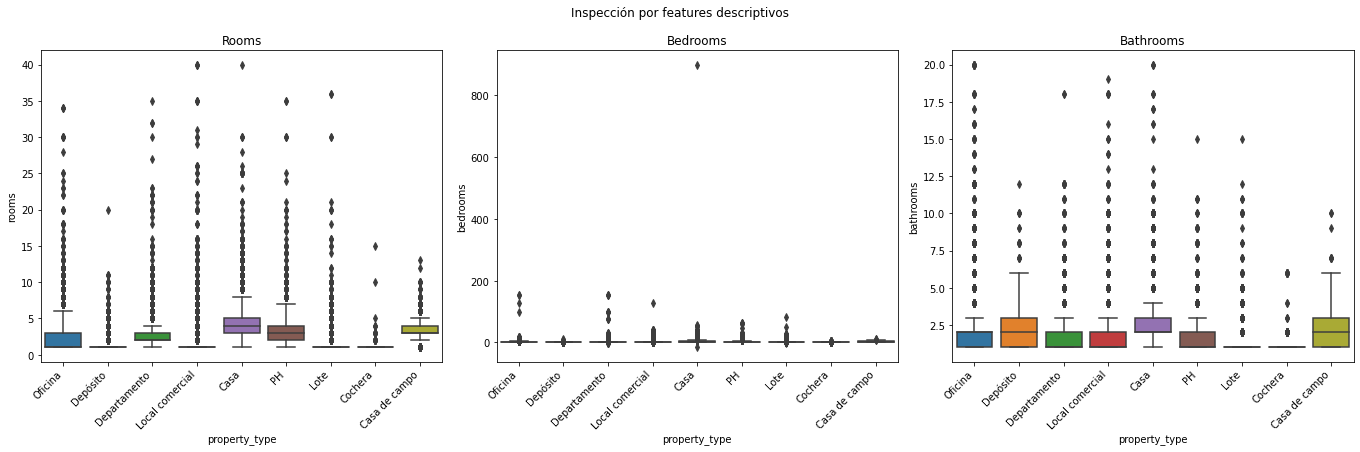

In [41]:
# Miramos la distribución de datos por features que describen property_type
fig, ax = plt.subplots(1, 3, figsize=(19, 6))

for i, col in enumerate(["rooms", "bedrooms", "bathrooms"]):
   sns.boxplot(data=df, x='property_type', y=col, ax=ax[i])
   ax[i].set_title(col.title())

fig.suptitle('Inspección por features descriptivos', y=1.04)
fig.autofmt_xdate(rotation=45)
fig.tight_layout()
plt.show()


In [42]:
# Utilizamos prop, contiene tipos de propiedades.
extremos = []

for i, feature in enumerate(["rooms", "bedrooms", "bathrooms"]):
    # Extremos de precios por tipo de operación
    extremos.append(dict(zip(prop, map(q_outlier,
                (df[df.property_type == p][feature].values for p in prop))
    )))

    print(f'{feature}:')
    pprint.pprint(extremos[i])
    print('')

rooms:
{'Casa': (0.0, 8.0),
 'Casa de campo': (1.5, 5.5),
 'Cochera': (1.0, 1.0),
 'Departamento': (0.5, 4.5),
 'Depósito': (1.0, 1.0),
 'Local comercial': (1.0, 1.0),
 'Lote': (1.0, 1.0),
 'Oficina': (-2.0, 6.0),
 'PH': (-1.0, 7.0)}

bedrooms:
{'Casa': (-1.0, 7.0),
 'Casa de campo': (-1.0, 7.0),
 'Cochera': (0.0, 0.0),
 'Departamento': (-0.5, 3.5),
 'Depósito': (0.0, 0.0),
 'Local comercial': (-1.5, 2.5),
 'Lote': (-1.5, 2.5),
 'Oficina': (-3.0, 5.0),
 'PH': (-2.0, 6.0)}

bathrooms:
{'Casa': (0.5, 4.5),
 'Casa de campo': (-2.0, 6.0),
 'Cochera': (1.0, 1.0),
 'Departamento': (-0.5, 3.5),
 'Depósito': (-2.0, 6.0),
 'Local comercial': (-0.5, 3.5),
 'Lote': (1.0, 1.0),
 'Oficina': (-0.5, 3.5),
 'PH': (-0.5, 3.5)}



In [43]:
# Registramos los extremos de cada tipo por precio y tipo descriptivo
for ext, col in zip(extremos, ["rooms", "bedrooms", "bathrooms"]):

    df[f'{col[:3]}_ext'] = df.property_type.map(ext, na_action='ignore')
    # Convertimos a True si el registro es un outlier.
    df[f'{col[:3]}_ext'] = df.apply(lambda x: x[col] <= x[f'{col[:3]}_ext'][0]
                                or x[col] >=x[f'{col[:3]}_ext'][1],
                                axis=1)


In [44]:
# Vemos los registros extremos dentro de cada grupo.
df[["roo_ext", "bed_ext", "bat_ext"]].sum()

roo_ext    47582
bed_ext    16842
bat_ext    24624
dtype: int64

In [45]:
# Registros para los cuales son extremos en todos features analizados.
f = ((df.surf_to_ext)
    &(df.surf_co_ext)
    &(df.price_ot_ext)
    &(df.roo_ext)
    &(df.bed_ext)
    &(df.bat_ext)
)
df[f][['id', 'property_type']].groupby('property_type').count()


,id
property_type,
Casa,41
Cochera,1
Departamento,1456
Local comercial,8
Lote,4
Oficina,7
PH,17


In [46]:
# Registros para los cuales son extremos en al menos uno de features analizados.
f1 = ((df.surf_to_ext)
    |(df.surf_co_ext)
    |(df.price_ot_ext)
    |(df.roo_ext)
    |(df.bed_ext)
    |(df.bat_ext)
)
df[f1][['id', 'property_type']].groupby('property_type').count()


,id
property_type,
Casa,28975
Casa de campo,381
Cochera,5105
Departamento,28015
Depósito,4153
Local comercial,16918
Lote,18886
Oficina,6986
PH,1535


In [47]:
# Vemos la cantidad de outliers que coinciden en:
# todos los features 
print(f'Hay {len(df[f])} registros outliers en todos los features analizados.')
print(f'El {round(len(df[f])/len(df), 3)*100}% de los datos\n')
# almenos un features
print(f'Hay {len(df[f1])} registros outliers en al menos uno de los features analizados')
print(f'El {round(len(df[f1])/len(df), 3)*100}% de los datos')


Hay 1534 registros outliers en todos los features analizados.
El 0.2% de los datos

Hay 110954 registros outliers en al menos uno de los features analizados
El 17.7% de los datos


## Eliminados outliers y valores inconsistentes

Vemos que hay 1542 datos que son extremos para los features:

* `urface_total`
* `surface_covered`
* `price`
* `rooms`
* `bedrooms`
* `athrooms`

A estos registros los llamaremos **outliers naturales**, y serán registrados en una variable aparte para ser analizados por separado del resto de los datos.


In [48]:
out_nat = df[f].copy()


Vemos que hay 111.703 datos (17.7% del total) que son extremos para al menos para unos de los siguientes features:

* `urface_total`
* `surface_covered`
* `price`
* `rooms`
* `bedrooms`
* `bathrooms`

Llamaremos **outliers** a aquellos datos que poseen valores extremos _NO_ en __todos__ sus registros, para ser analizados como datos a depurar bajo la sospecha de errores de carga.


In [49]:
out = df[f1&~f].copy()
out_nat.id.size, out.id.size


(1534, 109420)

In [50]:
# Cramos la variable DataFrameClean
dfc = df[~f1].copy()


Vemos como quedan los datos luego de la extraxión de los valores más extremos.

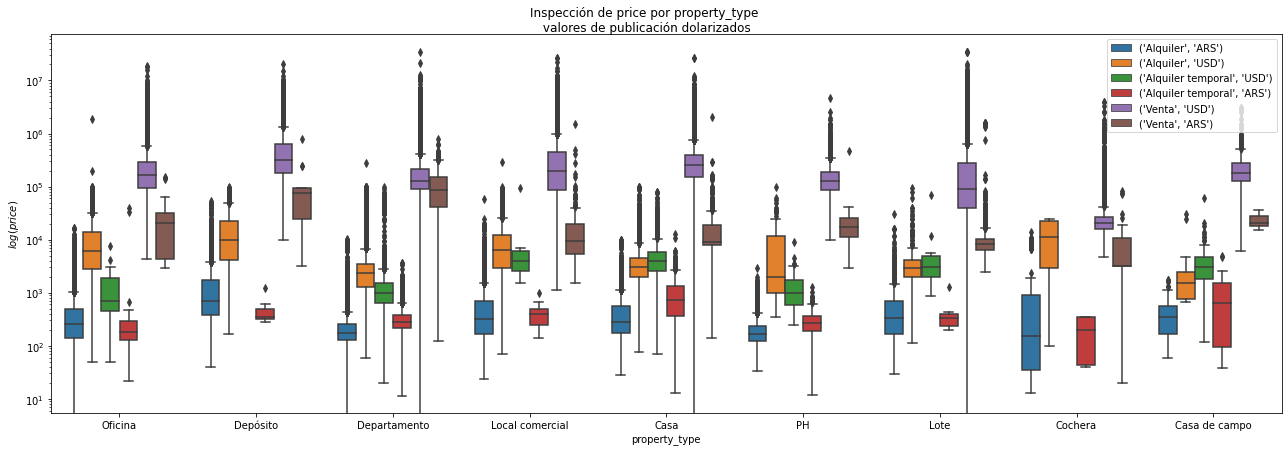

In [75]:
# Inspección segregada por moneda y tipo de operación.
fig, axs = plt.subplots(1,figsize=(18, 6))

tit = 'Inspección de price por property_type'\
    '\n valores de publicación dolarizados'

fig.suptitle(tit, y=1.04)

sns.boxplot(x="property_type", y="price_USD", data=df, ax=axs,
            hue=df.sort_values(by='operation_type')[
                ['operation_type', 'currency']].apply(tuple, axis=1))

axs.set_yscale('log')
axs.set_ylabel('$log(price)$')

fig.tight_layout()
plt.show()

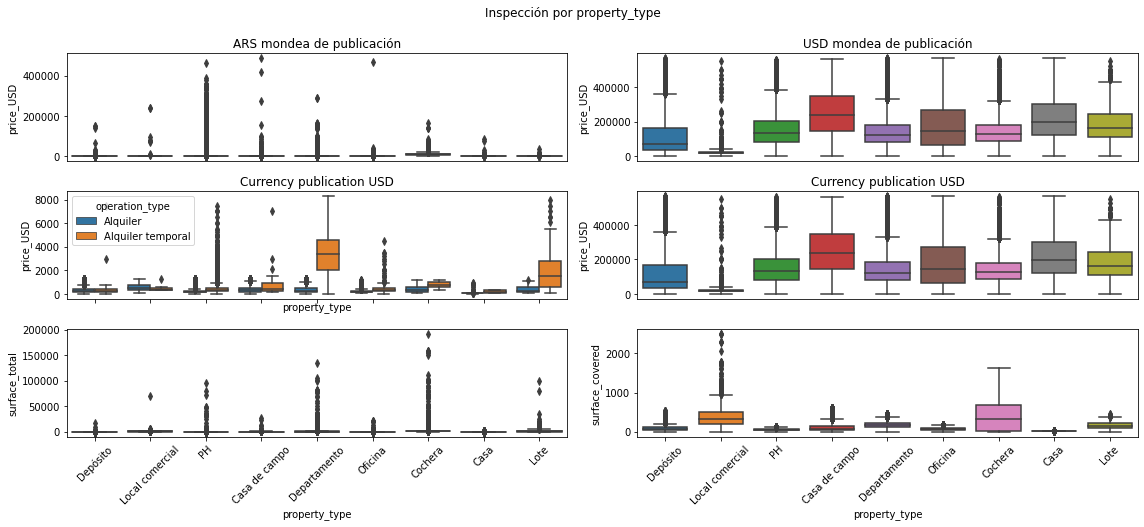

In [74]:
# correr un panel donde esten todos los gráficos que necesito para demostrar que 
# Necesito quedarme con 2 veces el desvío estantard.
fig, axs = plt.subplots(4, 2, figsize=(16, 7), sharex=True)

fig.suptitle('Inspección por property_type', y=1.04)

sns.boxplot(x="property_type", y="price_USD",data=dfc[dfc.currency=='ARS'],
            ax=axs[0, 0]).set(title='ARS mondea de publicación')
axs[0, 0].get_xaxis().set_visible(False)

sns.boxplot(x="property_type", y="price_USD",data=dfc[dfc.currency=='USD'],
            ax=axs[0, 1]).set(title='USD mondea de publicación')
axs[0, 1].get_xaxis().set_visible(False)

sns.boxplot(x="property_type", y="price_USD",data=dfc[dfc.operation_type!='Venta'], hue='operation_type',
            ax=axs[1, 0]).set(title='Alquiler, alquiler temporal')
axs[1, 1].get_xaxis().set_visible(False)

sns.boxplot(x="property_type", y="price_USD",data=dfc[dfc.operation_type!='Venta'], hue='operation_type',
            ax=axs[1, 0]).set(title='Alquiler, alquiler temporal')
axs[1, 2].get_xaxis().set_visible(False)


sns.boxplot(x="property_type", y="price_USD",data=dfc[dfc.currency=='USD'],
            ax=axs[1, 1]).set(title='Currency publication USD')
axs[1, 1].get_xaxis().set_visible(False)


sns.boxplot(x="property_type", y="surface_total", data=dfc, ax=axs[2, 0])
axs[2, 0].set_xticklabels(set(dfc.property_type), rotation =45)

sns.boxplot(x="property_type", y="surface_covered", data=dfc, ax=axs[2, 1])
axs[2, 1].set_xticklabels(set(dfc.property_type), rotation =45)

fig.tight_layout()
plt.show()

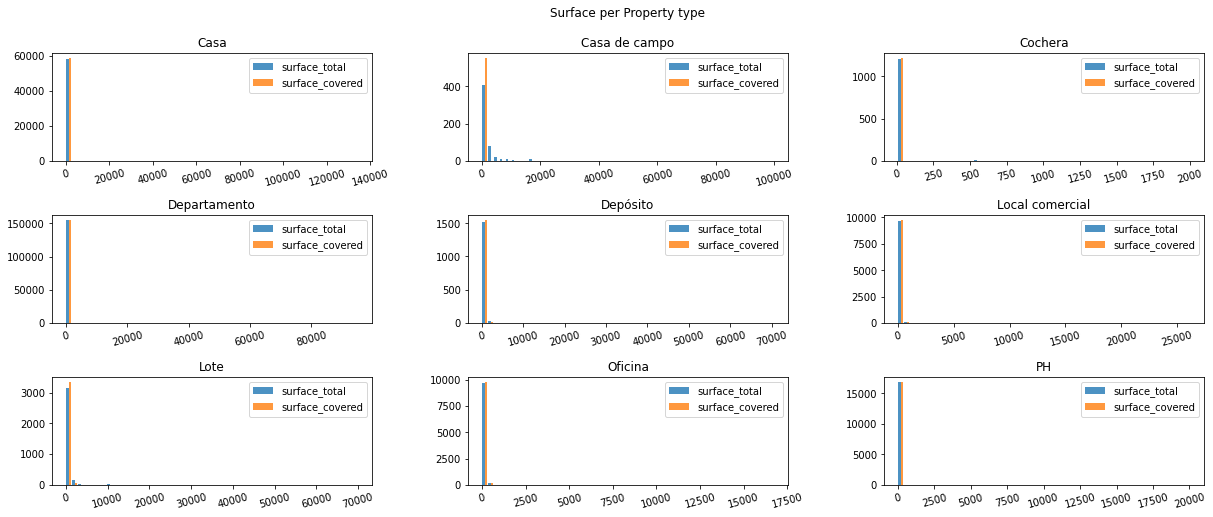

In [ ]:
dfc[['surface_total','surface_covered', 'property_type']].hist(by='property_type',
        bins=50, alpha=0.8, xrot=15, figsize=(20,8), legend=True)

plt.suptitle("Surface per Property type")
plt.show()

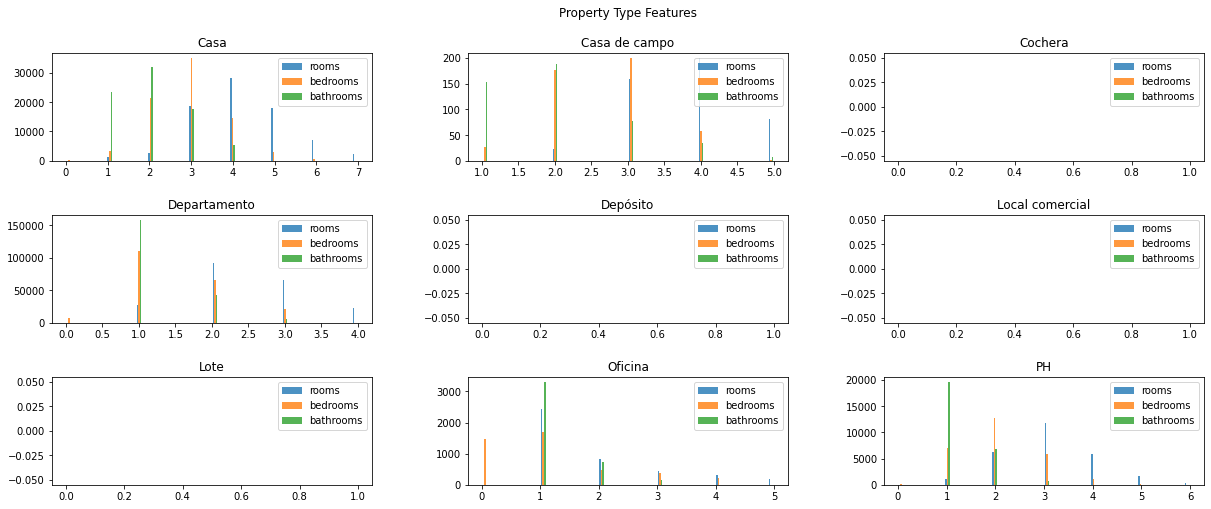

In [ ]:
dfc[['rooms','bedrooms', 'bathrooms', 'property_type']].hist(by='property_type',
        bins=50, alpha=0.8, xrot=0, figsize=(20,8), legend=True)

plt.suptitle("Property Type Features")
plt.show()

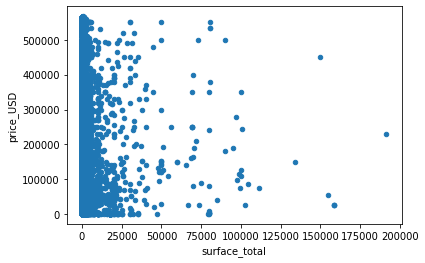

In [ ]:
dfc.plot.scatter(x='surface_total', y='price_USD')

In [ ]:
len(dfc[dfc.surface_total>700])

15303

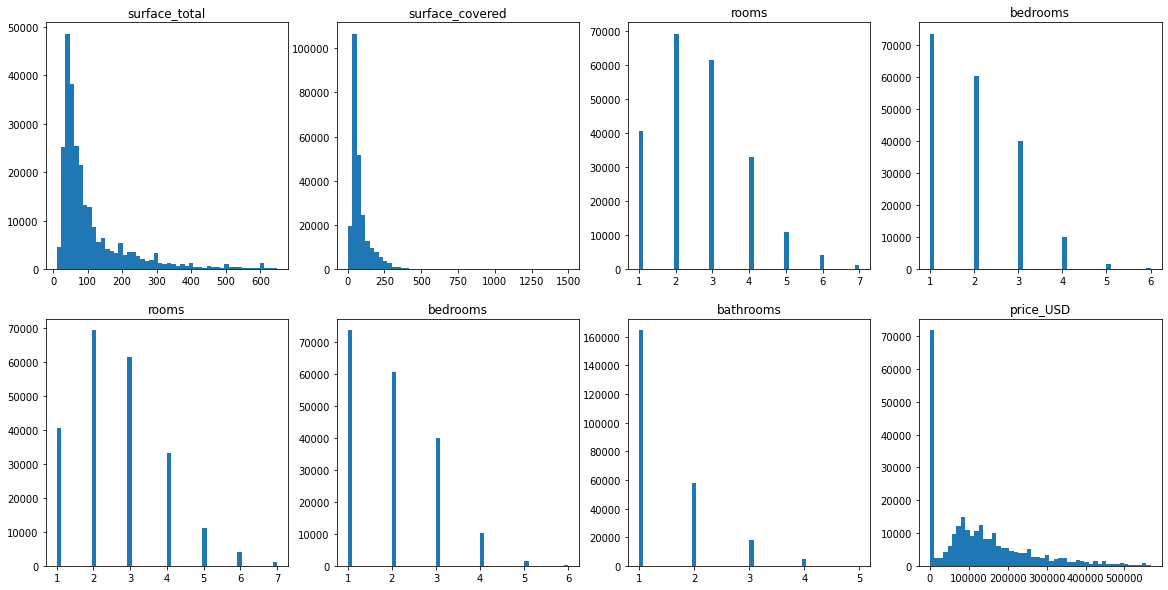

In [ ]:
#grafico nuevamente para ver los features donde se eliminiaron los datos 
columns = ['surface_total', 'surface_covered', 'rooms','bedrooms', 'bathrooms', 'price_USD']

N_col = 4
N = len(columns)
N_rows = int(np.ceil(N/N_col))

fig, ax = plt.subplots(N_rows,N_col, figsize=(5*N_col,5*N_rows))

for i in range(N_rows):
    for j in range(N_col):
        ax[i,j].hist(dfc[dfc.surface_total<650][columns[i*N_rows+j]], bins=50)
        ax[i,j].set_title(columns[i*N_rows+j])


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3213033a10>,
      dtype=object)

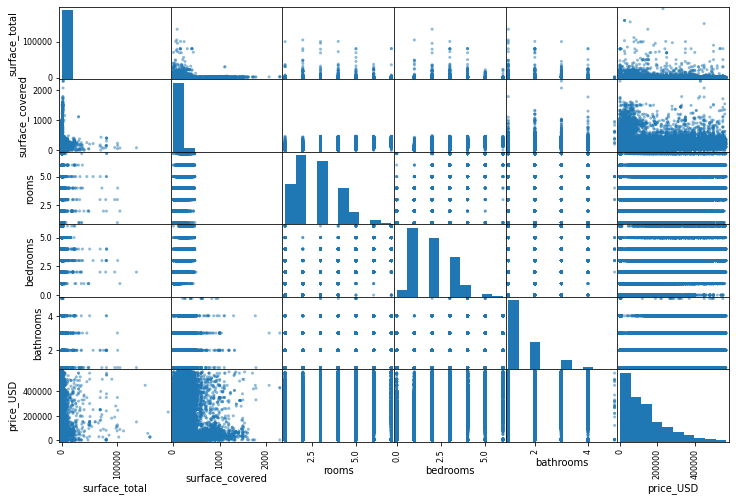

In [ ]:
pd.plotting.scatter_matrix(dfc[columns], figsize=(12, 8))

In [ ]:
np.nanquantile(dfc.loc[df.property_type=='Casa de campo'].surface_total.values, 0.90)


8315.800000000017

###**Surface**

Miramos los datos donde la superfice cubierta es mayor a la total. 
Estos datos están mal cargados.

In [ ]:
display(dfc[(dfc.surface_covered > dfc.surface_total)][['surface_covered', 'surface_total', 'description']].head(5))

,surface_covered,surface_total,description
952,42.0,37.0,Tenemos frente y contrafrente. Alquiler o Vent...
2501,250.0,173.0,BARRIO: Residencial. Av. del Libertador al río...
2710,65.0,32.0,"Complejo de 6 viviendas, desarrollado sobre lo..."
2959,40.0,35.0,CODIGO: ubicado en: Av Directorio 3200 - Pub...
2978,40.0,35.0,CODIGO: ubicado en: Av Directorio 3200 - Pub...


In [ ]:
print(f'Hay {dfc[(dfc.surface_covered > dfc.surface_total)].id.count()}\
 datos donde la superficie cubierte es mayor a la superficie total')


Hay 2181 datos donde la superficie cubierte es mayor a la superficie total


In [ ]:
print(f'Representan un \
{round((dfc[(dfc.surface_covered > dfc.surface_total)].id.count()/len(dfc))*100, 3)} %\
del total')


Representan un 0.421 %del total


In [ ]:
# Eliminamos los datos incongruentes de superficie
dfc.drop(dfc[(dfc.surface_covered > dfc.surface_total)].index, inplace=True)


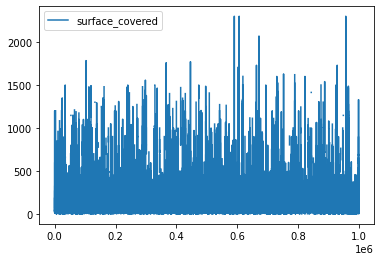

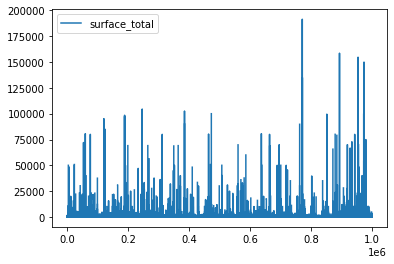

In [ ]:
dfc[dfc.property_type!="Casa de campo"][['surface_covered']].plot()
dfc[dfc.property_type!="Casa de campo"][['surface_total']].plot()

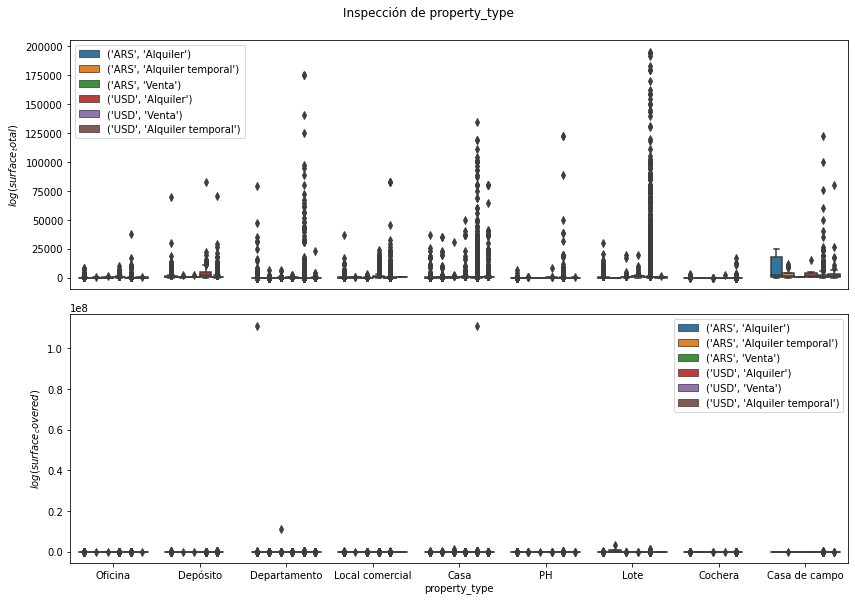

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

fig.suptitle('Inspección de property_type', y=1.04)

sns.boxplot(x="property_type", y="surface_total", data=df, ax=axs[0],
            hue=df[['currency', 'operation_type']].apply(tuple, axis=1))
#axs[0].set_yscale('log')
axs[0].set_ylabel('$log(surface_total)$')
axs[0].get_xaxis().set_visible(False)

sns.boxplot(x="property_type", y="surface_covered", data=df, ax=axs[1],
            hue=df[['currency', 'operation_type']].apply(tuple, axis=1))
#axs[1].set_yscale('log')
axs[1].set_ylabel('$log(surface_covered)$')

fig.tight_layout()
plt.show()


In [ ]:
dfc[dfc.property_type == 'Casa'].surface_covered.max(), dfc[dfc.property_type == 'Departamento'].surface_covered.max() 

(460.0, 131.0)

In [ ]:
dfc.drop(dfc[(dfc.property_type == 'Casa')&(dfc.surface_covered == 461)].index, inplace=True)


In [ ]:
dfc.drop(dfc[(dfc.property_type == 'Departemento')&(dfc.surface_covered == 461)].index, inplace=True)


In [ ]:
dfc[(dfc.property_type=='Casa de campo')&(dfc.operation_type=='Alquiler')&(dfc.currency.isnull())].surface_total.max()


80000.0

In [ ]:
dfc[(dfc.surface_total <= 80_000)].id.count(), dfc.id.count()

(288629, 527121)

In [ ]:
dfc = dfc[(dfc.surface_total <= 80_000)]

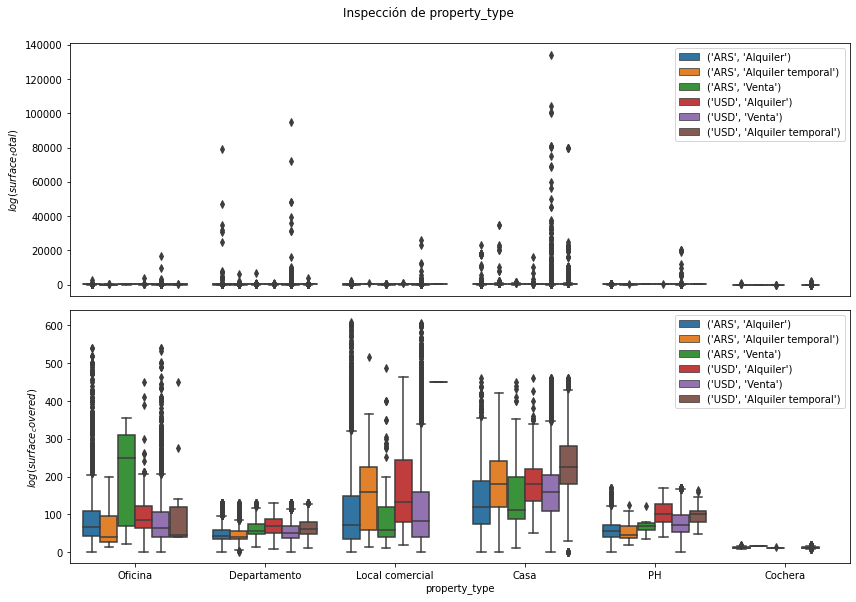

In [ ]:
fig, axs = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

fig.suptitle('Inspección de property_type', y=1.04)

sns.boxplot(x="property_type", y="surface_total", data=dfc[(dfc.property_type!='Depósito')&(dfc.property_type!='Lote')&(dfc.property_type!='Casa de campo')], ax=axs[0],
            hue=df[['currency', 'operation_type']].apply(tuple, axis=1))
#axs[0].set_yscale('log')
axs[0].set_ylabel('$log(surface_total)$')
axs[0].get_xaxis().set_visible(False)

sns.boxplot(x="property_type", y="surface_covered", data=dfc[(dfc.property_type!='Depósito')&(dfc.property_type!='Lote')&(dfc.property_type!='Casa de campo')], ax=axs[1],
            hue=df[['currency', 'operation_type']].apply(tuple, axis=1))
#axs[1].set_yscale('log')
axs[1].set_ylabel('$log(surface_covered)$')

fig.tight_layout()
plt.show()


In [ ]:
dfc[(dfc.property_type!='Deposito')].property_type.unique()

array(['Casa', 'Oficina', 'Depósito', 'Departamento', 'Local comercial',
       'Lote', 'PH', 'Cochera', 'Casa de campo'], dtype=object)